### Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

import xgboost as xgb
from imblearn.over_sampling import SMOTE

from MachineLearning import models

### Read Databases

In [2]:
local_view = pd.read_csv(
    "Preprocessed\preprocessed_local_view.csv", sep=",")
global_view = pd.read_csv(
    "Preprocessed\preprocessed_global_view.csv", sep=",")

local_view.drop(["Unnamed: 0"], axis=1, inplace=True)
global_view.drop(["Unnamed: 0"], axis=1, inplace=True)

dropna_list = [local_view, global_view]

for var in dropna_list:
    var.dropna(inplace=True)
    
print("\n============================================================================================================")
print("Checking base balance: ")

targets = pd.concat([local_view[['label']].rename(columns={'label': 'target_local'}), global_view[[
                    'label']].rename(columns={'label': 'target_global'})], axis=0, ignore_index=True)
counts = targets.apply(pd.Series.value_counts).fillna(0).astype(int)

print(counts)


Checking base balance: 
                target_local  target_global
FALSE POSITIVE          4744           4215
CONFIRMED               2639           2429


### Transform target column values ​​into 0 and 1

In [3]:
target_map = {'CONFIRMED': 1, 'FALSE POSITIVE': 0}
local_view['label'] = local_view['label'].map(target_map)
global_view['label'] = global_view['label'].map(target_map)

### Separating into training and testing

In [4]:
# ============= Separating into X and y =============

X_local = local_view.iloc[:, :-1]
X_global = global_view.iloc[:, :-1]

y_local = local_view['label']
y_global = global_view['label']

# ============= Separating into training and testing =============

X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(
    X_local, y_local, test_size= 0.3, random_state=42, stratify=y_local)

X_train_global, X_test_global, y_train_global, y_test_global = train_test_split(
    X_global, y_global, test_size= 0.3, random_state=42, stratify=y_global)

### Smote balancing

In [5]:
# Smote balancing
smote = SMOTE()  # Create a SMOTE instance
X_train_local, y_train_local = smote.fit_resample(X_train_local, y_train_local)  # Apply SMOTE to data local
X_train_global, y_train_global = smote.fit_resample(X_train_global, y_train_global)  # Apply SMOTE to data global

### All models and parameters of classification models

In [6]:
models_and_parameters_C = {
    'AdaBoostClassifier': {
        'clf': AdaBoostClassifier(random_state=42),
        'parameters': {
            'n_estimators': range(60, 220, 40)
        },
    },
    'XGBClassifier': {
        'clf': xgb.XGBClassifier(objective = "binary:logistic", random_state=42),
        'parameters': {
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'max_depth': [3, 4, 5]
        }
    },
    # 'SVM': {
    #     'clf': SVC(probability=True, random_state=42),
    #     'parameters': {
    #         'C': [1, 3, 5, 10, 15],
    #         'kernel': ['linear', 'rbf'],
    #         'tol': [1e-3, 1e-4]
    #     },
    # },
    # 'MLPClassifier': {
    #     'clf': MLPClassifier(random_state=42),
    #     'parameters': {
    #         'solver': ['sgd', 'adam'], 
    #         'max_iter': [1000, 1300, 1500, 2000], 
    #         'alpha': 10.0 ** -np.arange(1, 10), 
    #         'hidden_layer_sizes':np.arange(10, 15),
    #         'tol': [1e-3, 1e-4]
    #     },
    # },
}

### Classifier models

In [7]:
# models.defining_classifiers(models_and_parameters_C, X_train_local, y_train_local, X_test_local, y_test_local, "local")
# models.defining_classifiers(models_and_parameters_C, X_train_global, y_train_global, X_test_global, y_test_global, "global")

### Dynamic selection of classifiers

In [8]:
models.dynamic_selection_of_classifiers(models_and_parameters_C, X_train_local, y_train_local, X_test_local, y_test_local, "local")


================================== Dynamic Selection ==================================
Model: AdaBoostClassifier

- Running models on data in a local vision

================================== Dynamic Selection ==================================
Model: XGBClassifier

- Running models on data in a _local vision

Runtime: 1821.02 seconds

Accuracy using KNORAU with different classifiers: 0.6857787810383748

Accuracy using KNORAE with different classifiers: 0.6862302483069977


### LSTM

In [10]:
# array list, no caso seria -> 201 instancias + label + 201 instancias + label + ...

# uni_data = [[1.837927  1.802662  1.232059  1.512449 LABEL(1 or 0) 1.569320  1.405640  1.000000 1.551273 LABEL(1 or 0)]]

uni_data = local_view.values

# Using numpy.ravel to turn array into a one-dimensional array
uni_data = uni_data.ravel()

# The variables below ensure standardization and reproducibility

TRAIN_SPLIT = 1038788

# 7383 * 201 = 1.483.983 (100%)
# Train 70 % -> 1.038.788

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8)                 320       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
4057/4057 [==============================] - 258s 63ms/step - loss: -5.0764 - val_loss: -10.9896
Epoch 2/10
4057/4057 [==============================] - 242s 59ms/step - loss: -13.5141 - val_loss: -20.2930
Epoch 3/10
4057/4057 [==============================] - 241s 59ms/step - loss: -21.4187 - val_loss: -28.8129
Epoch 4/10
4057/4057 [==============================] - 236s 58ms/step - loss: -29.3398 - val_loss: -38.7903
Epoch 5/10
4057/405

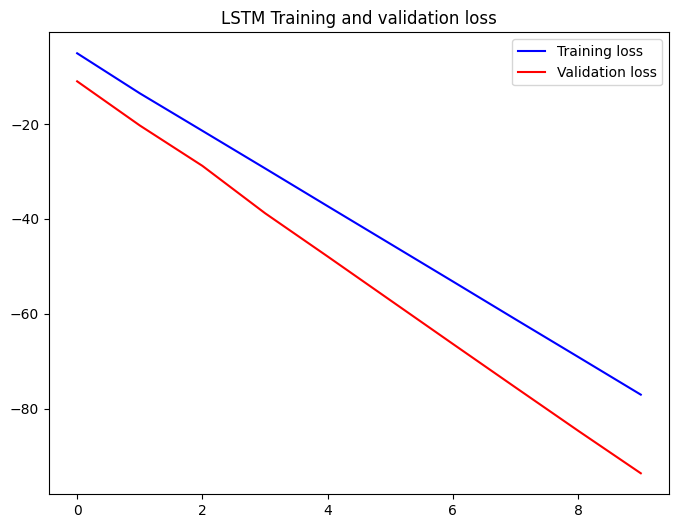

8/8 [==============================] - 1s 14ms/step


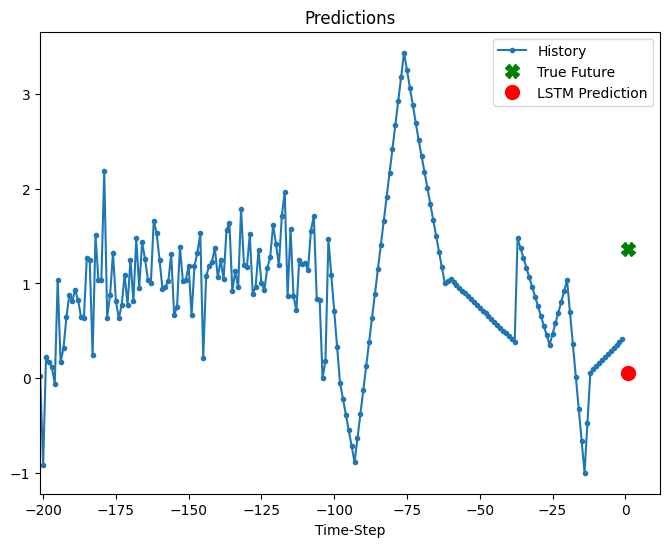

8/8 [==============================] - 0s 13ms/step


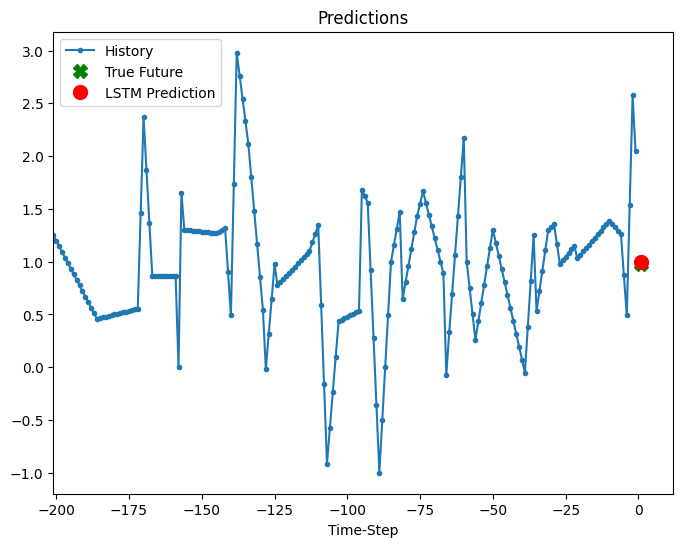

8/8 [==============================] - 0s 14ms/step


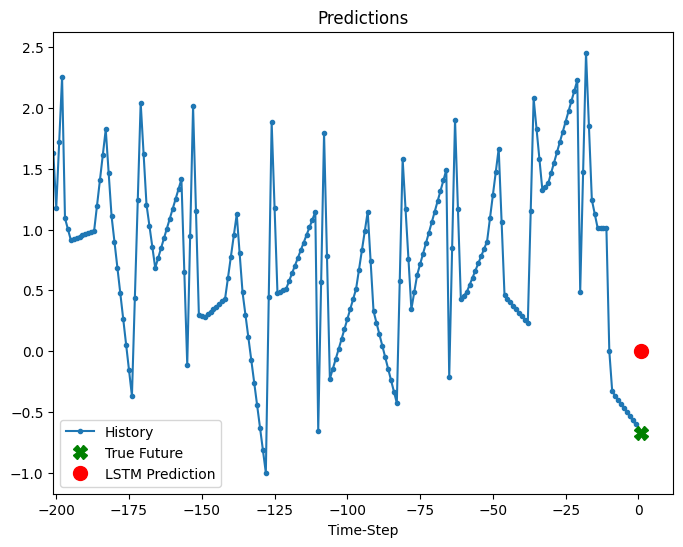

8/8 [==============================] - 0s 13ms/step


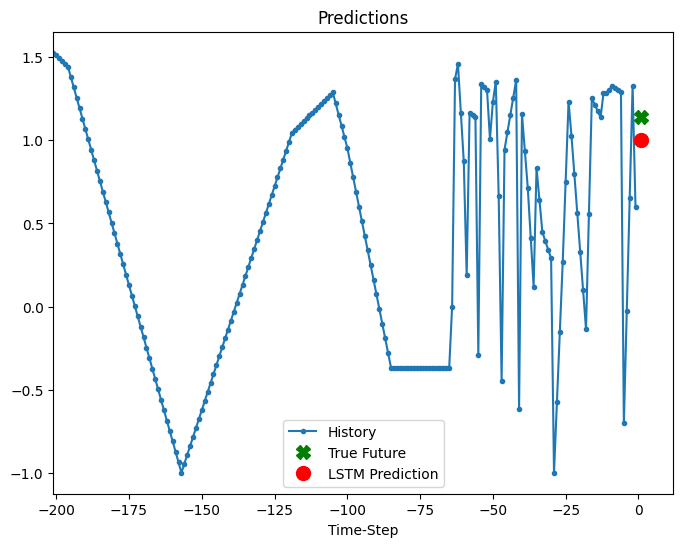

8/8 [==============================] - 0s 12ms/step


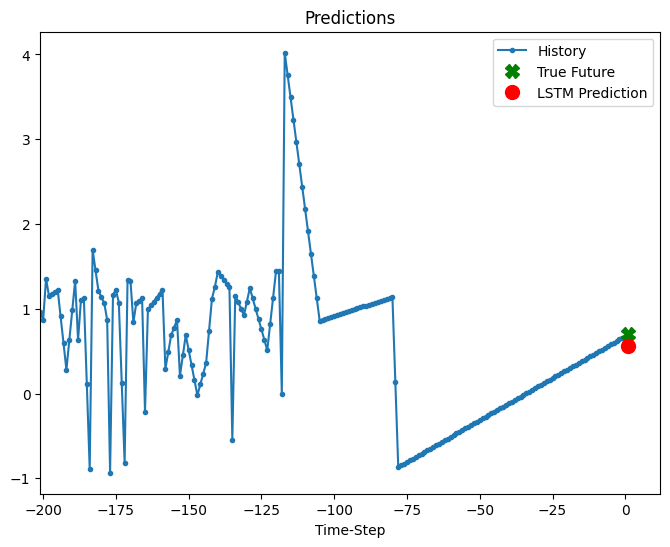

8/8 [==============================] - 0s 13ms/step
[0.37653583]


In [14]:
'''History Window Size'''
univariate_past_history = 201
future = univariate_future_target = 1

x_train_uni, y_train_uni = models.univariate_data(uni_data, 0, TRAIN_SPLIT,
                                        univariate_past_history,
                                        univariate_future_target)
x_val_uni, y_val_uni = models.univariate_data(uni_data, TRAIN_SPLIT, None,
                                    univariate_past_history,
                                    univariate_future_target)


# Test LSTM data local
models.method_LSTM(x_train_uni, y_train_uni, x_val_uni, y_val_uni, univariate_past_history, future)

# Test LSTM data global
# models.method_LSTM(x_train_uni, y_train_uni, x_val_uni, y_val_uni)